In [9]:
from sklearn.datasets import make_blobs
from sklearn import model_selection as ms
from numpy import loadtxt, histogram, float32, int32
from matplotlib.pyplot import scatter, bar, title, xlabel, ylabel, show, imshow
from cv2 import ml, imread
from matplotlib.colors import rgb_to_hsv


In [4]:
X,Y = make_blobs(n_samples=10,centers=3,n_features=2,random_state=0)

In [11]:
X

array([[ 1.12031365,  5.75806083],
       [ 1.7373078 ,  4.42546234],
       [ 2.36833522,  0.04356792],
       [ 0.87305123,  4.71438583],
       [-0.66246781,  2.17571724],
       [ 0.74285061,  1.46351659],
       [-4.07989383,  3.57150086],
       [ 3.54934659,  0.6925054 ],
       [ 2.49913075,  1.23133799],
       [ 1.9263585 ,  4.15243012]])

(100, 2)


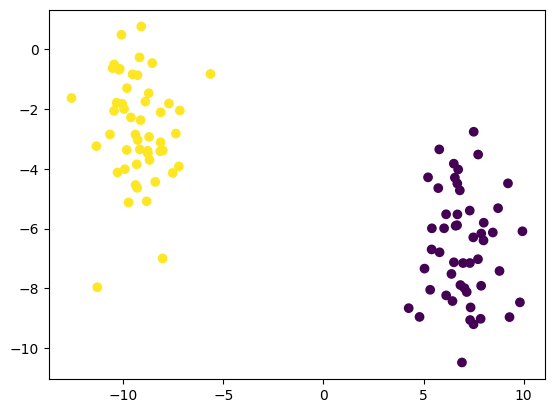

In [12]:
# ----- SIMPLE DATASET -----
# Generate a dataset of 2D data points and their ground truth labels
x, y_true = make_blobs(n_samples=100, centers=2, cluster_std=1.5, random_state=15)


# Plot the dataset
scatter(x[:, 0], x[:, 1], c=y_true)
show()

In [14]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = ms.train_test_split(x, y_true, test_size=0.2, random_state=10)

# Create a new Normal Bayes Classifier
norm_bayes = ml.NormalBayesClassifier_create()

# Train the classifier on the training data
norm_bayes.train(x_train.astype(float32), ml.ROW_SAMPLE, y_train)

True

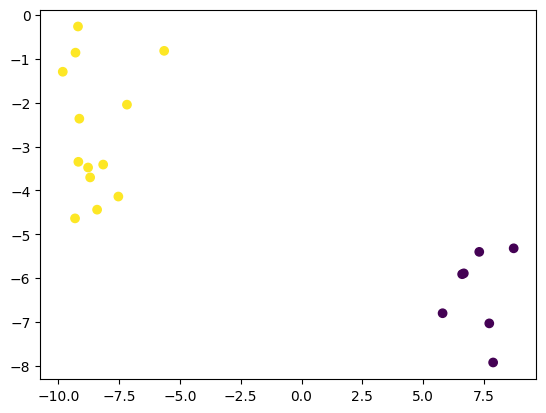

In [15]:
# Generate a prediction from the trained classifier
ret, y_pred, y_probs = norm_bayes.predictProb(x_test.astype(float32))

# Plot the class predictions
scatter(x_test[:, 0], x_test[:, 1], c=y_pred)
show()

In [24]:
data = loadtxt("./Skin_NonSkin.txt",dtype=int)


[ 73  84 122   1]


In [30]:
# Select the BGR values from the loaded data
BGR = data[:, :3]

print(BGR[1])

[ 73  84 122]


In [41]:
# RGB = [list(reversed(li)) for li in BGR.copy()]

# RGB[1]

In [49]:
# Convert to RGB by swapping array columns
RGB = BGR.copy()
RGB[:, [2, 0]] = RGB[:, [0, 2]]

# print(RGB[1])

print(RGB.shape)

(245057, 3)


In [55]:
HSV = rgb_to_hsv(RGB.reshape(RGB.shape[0], -1, 3) / 255)
HSV = HSV.reshape(RGB.shape[0], 3)

In [59]:
# Select only the hue values
hue = HSV[:, 0] * 360

# Select the labels from the loaded data
labels = data[:, -1]

In [73]:
red = RGB[:,0]

In [60]:

def plot_hist(x, labels):

    # Choose the skin-labelled hue values
    skin = x[labels == 1]
    non_skin = x[labels == 2]

    skin_labels = labels[labels == 1]

    # Compute their histogram
    hist, bin_edges = histogram(skin, range=[0, 360], bins=360)

    # Display the computed histogram
    bar(bin_edges[:-1], hist, width=4)
    xlabel('Hue')
    ylabel('Frequency')
    title('Histogram of the hue values of skin pixels')
    show()

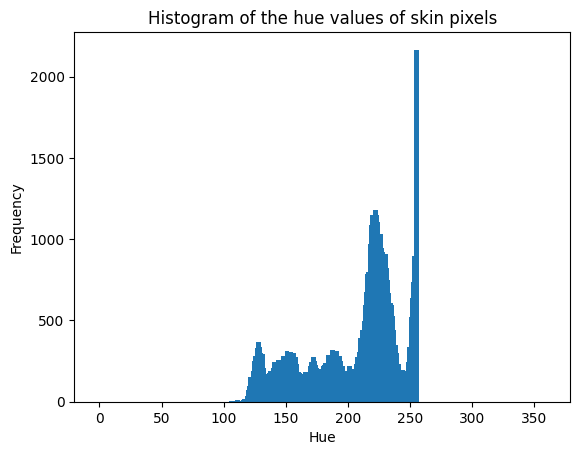

In [74]:
plot_hist(red, labels)

In [75]:
# Create a new Normal Bayes Classifier
norm_bayes = ml.NormalBayesClassifier_create()

# Train the classifier on the hue values
norm_bayes.train(red.astype(float32), ml.ROW_SAMPLE, labels)

True

In [76]:
# Load a test image
face_img = imread("/home/nipun/Pictures/right_eye.png")

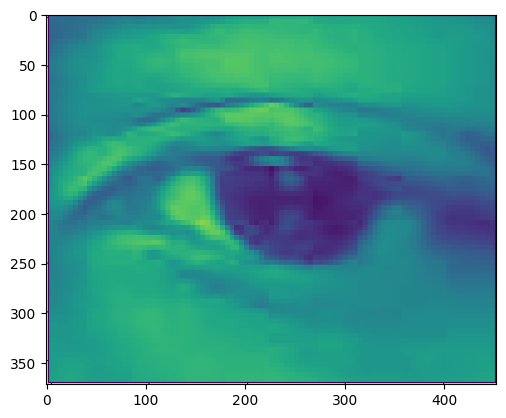

In [78]:
face_BGR = face_img.reshape(-1, 3)

# Convert to RGB by swapping array columns
face_RGB = face_BGR.copy()
face_RGB[:, [2, 0]] = face_RGB[:, [0, 2]]


face_red = face_RGB[:,0]

imshow(face_red.reshape(face_img.shape[0], face_img.shape[1]))
show()

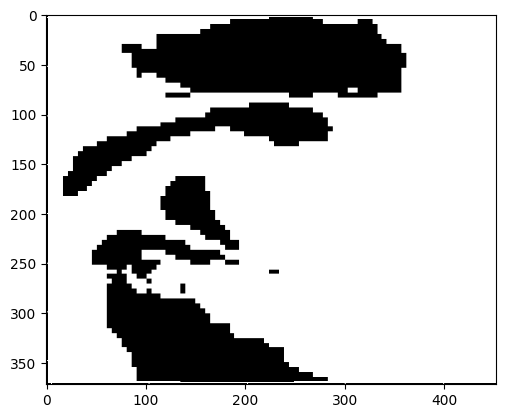

In [80]:
# Generate a prediction from the trained classifier
ret, labels_pred, output_probs = norm_bayes.predictProb(face_red.astype(float32))

# Reshape array into the input image size and choose the skin-labelled pixels
skin_mask = labels_pred.reshape(face_img.shape[0], face_img.shape[1], 1) == 2

# Display the segmented image
imshow(skin_mask, cmap='gray')
show()

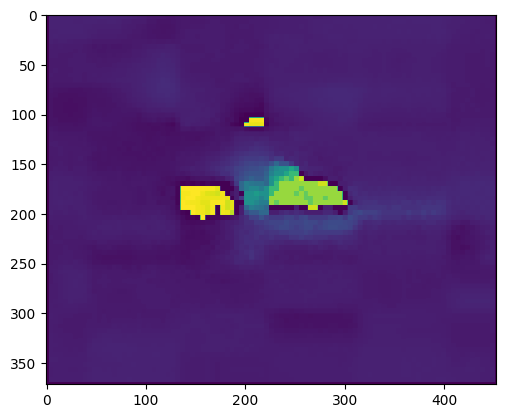

In [77]:
# Reshape the image into a three-column array
face_BGR = face_img.reshape(-1, 3)

# Convert to RGB by swapping array columns
face_RGB = face_BGR.copy()
face_RGB[:, [2, 0]] = face_RGB[:, [0, 2]]

# Convert from RGB to HSV
face_HSV = rgb_to_hsv(face_RGB.reshape(face_RGB.shape[0], -1, 3) / 255)
face_HSV = face_HSV.reshape(face_RGB.shape[0], 3)

# Select only the hue values
face_hue = face_HSV[:, 0] * 360

# Display the hue image
imshow(face_hue.reshape(face_img.shape[0], face_img.shape[1]))
show()

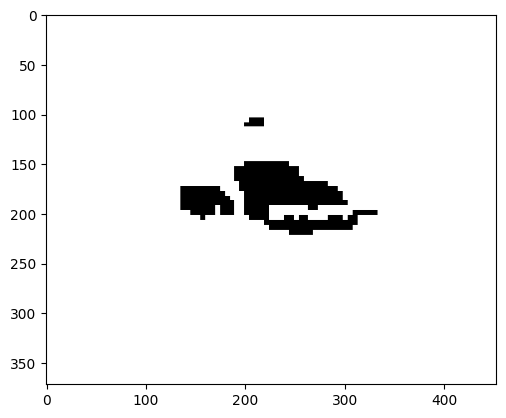

In [71]:
# Generate a prediction from the trained classifier
ret, labels_pred, output_probs = norm_bayes.predictProb(face_hue.astype(float32))

# Reshape array into the input image size and choose the skin-labelled pixels
skin_mask = labels_pred.reshape(face_img.shape[0], face_img.shape[1], 1) == 1

# Display the segmented image
imshow(skin_mask, cmap='gray')
show()
